<a href="https://colab.research.google.com/github/zxs1652/zcq/blob/master/%E7%94%B2%E9%AA%A8%E6%96%87100%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Mar  6 08:01:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

!unzip /content/gdrive/MyDrive/colab/class/date.zip -d /content/gdrive/MyDrive/colab/class/datadata

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_469.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_147.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_382.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_751.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_843.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_691.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_698.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_46.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_449.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_1000.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_563.jpg  
  inflating: /content/gdrive/MyDrive/colab/class/datadata/数据/0008/0008_91.jpg  
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub

from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

     |████████████████████████████████| 349.7MB 32kB/s 
     |████████████████████████████████| 3.1MB 39.4MB/s 
     |████████████████████████████████| 501kB 39.4MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 


In [ ]:
data_root='/content/gdrive/MyDrive/colab/class/datadata/数据'

In [ ]:
data_root='/content/gdrive/MyDrive/colab/class/datadata/数据'
import tensorflow as tf
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
#datagen_kwargs_train = dict(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

/content/gdrive/MyDrive/colab/class/datadata/数据
Found 10589 images belonging to 100 classes.
Found 42565 images belonging to 100 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)


Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 100)
['0001' '0002' '0003' '0004' '0005' '0006' '0007' '0008' '0009' '0010'
 '0011' '0012' '0013' '0014' '0015' '0016' '0017' '0018' '0019' '0020'
 '0021' '0022' '0023' '0024' '0025' '0026' '0027' '0028' '0029' '0030'
 '0031' '0032' '0033' '0034' '0035' '0036' '0037' '0038' '0039' '0040'
 '0041' '0042' '0043' '0044' '0045' '0046' '0047' '0048' '0049' '0050'
 '0051' '0052' '0053' '0054' '0055' '0056' '0057' '0058' '0059' '0060'
 '0061' '0062' '0063' '0064' '0065' '0066' '0067' '0068' '0069' '0070'
 '0071' '0072' '0073' '0074' '0075' '0076' '0077' '0078' '0079' '0080'
 '0081' '0082' '0083' '0084' '0085' '0086' '0087' '0088' '0089' '0090'
 '0091' '0092' '0093' '0094' '0095' '0096' '0097' '0098' '0099' '0100']


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               128100    
Total params: 2,386,084
Trainable params: 128,100
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit_generator(
    train_generator, 
    epochs=5,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1331/1331 [==============================] - ETA: 0s - loss: 2.5546 - acc: 0.4028WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fcf5c57b950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1331/1331 [==============================] - 164s 121ms/step - loss: 2.5540 - acc: 0.4029 - val_loss: 0.8715 - val_acc: 0.7759
Epoch 2/5
1331/1331 [==============================] - 154s 116ms/step - loss: 0.9739 - acc: 0.7275 - val_loss: 0.6600 - val_acc: 0.8204
Epoch 3/5
1331/1331 [==============================] - 155s 116ms/step - loss: 0.7900 - acc: 0.7756 - val_loss: 0.5913 - val_acc: 0.8326
Epoch 4/5
1331/1331 [==============================] - 155s 117ms/step - loss: 0.7052 - acc: 0.7925 - val_loss: 0.5554 - val_acc: 0.8419
Epoch 5/5
1331/1331 [==============================] - 155s 116ms/step - loss: 0.6596 - acc: 0.8090 - val_loss: 0.5020 

In [ ]:
hist1 = model.fit_generator(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


Epoch 1/10
1331/1331 [==============================] - 155s 117ms/step - loss: 0.6359 - acc: 0.8107 - val_loss: 0.5058 - val_acc: 0.8569
Epoch 2/10
1331/1331 [==============================] - 160s 120ms/step - loss: 0.6087 - acc: 0.8179 - val_loss: 0.4885 - val_acc: 0.8590
Epoch 3/10
1331/1331 [==============================] - 155s 117ms/step - loss: 0.5919 - acc: 0.8228 - val_loss: 0.4546 - val_acc: 0.8697
Epoch 4/10
1331/1331 [==============================] - 155s 116ms/step - loss: 0.5827 - acc: 0.8265 - val_loss: 0.4560 - val_acc: 0.8675
Epoch 5/10
1331/1331 [==============================] - 152s 114ms/step - loss: 0.5716 - acc: 0.8265 - val_loss: 0.4645 - val_acc: 0.8662
Epoch 6/10
1331/1331 [==============================] - 146s 110ms/step - loss: 0.5639 - acc: 0.8295 - val_loss: 0.4749 - val_acc: 0.8631
Epoch 7/10
1331/1331 [==============================] - 147s 110ms/step - loss: 0.5475 - acc: 0.8357 - val_loss: 0.4305 - val_acc: 0.8757
Epoch 8/10
1331/1331 [============

In [ ]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件
yaml_string = model.to_yaml()
open('100model_architecture.yaml', 'w').write(yaml_string)
# 保存模型参数到h5文件
model.save_weights('100model_weights.h5')
hist2 = model.fit_generator(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/content/gdrive/MyDrive/colab/saved_models


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


Epoch 1/10
1331/1331 [==============================] - 155s 117ms/step - loss: 0.5183 - acc: 0.8443 - val_loss: 0.4402 - val_acc: 0.8753
Epoch 2/10
1331/1331 [==============================] - 153s 115ms/step - loss: 0.5169 - acc: 0.8428 - val_loss: 0.4240 - val_acc: 0.8812
Epoch 3/10
1331/1331 [==============================] - 150s 112ms/step - loss: 0.5149 - acc: 0.8458 - val_loss: 0.4443 - val_acc: 0.8750
Epoch 4/10
1331/1331 [==============================] - 143s 107ms/step - loss: 0.5173 - acc: 0.8445 - val_loss: 0.4234 - val_acc: 0.8793
Epoch 5/10
1331/1331 [==============================] - 138s 104ms/step - loss: 0.5026 - acc: 0.8482 - val_loss: 0.4179 - val_acc: 0.8813
Epoch 6/10
1331/1331 [==============================] - 147s 110ms/step - loss: 0.5064 - acc: 0.8468 - val_loss: 0.4321 - val_acc: 0.8785
Epoch 7/10
1331/1331 [==============================] - 148s 111ms/step - loss: 0.4995 - acc: 0.8485 - val_loss: 0.4194 - val_acc: 0.8827
Epoch 8/10
1331/1331 [============

In [ ]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件
yaml_string = model.to_yaml()
open('101model_architecture.yaml', 'w').write(yaml_string)
# 保存模型参数到h5文件
model.save_weights('101model_weights.h5')
hist2 = model.fit_generator(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/content/gdrive/MyDrive/colab/saved_models


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


FileNotFoundError: ignored

In [ ]:
import yaml
import json
from keras.models import model_from_json
from keras.models import model_from_yaml

# 加载模型结构
modelaa = model_from_yaml(open('101model_architecture.yaml').read(),custom_objects={'KerasLayer': hub.KerasLayer})
# model = model_from_json(open('../docs/keras/model_architecture.json').read())

# 加载模型参数
modelaa.load_weights('101model_weights.h5')

In [ ]:
modelaa.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
data_root='/content/gdrive/MyDrive/colab/class/datadata/dataallall'
import tensorflow as tf
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
#datagen_kwargs_train = dict(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

/content/gdrive/MyDrive/colab/class/datadata/dataallall
Found 10589 images belonging to 100 classes.
Found 42564 images belonging to 100 classes.


In [ ]:
hist = modelaa.fit_generator(
    train_generator, 
    epochs=2,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1331/1331 [==============================] - ETA: 0s - loss: 0.4626 - acc: 0.8604WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fcfd1d79b90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1331/1331 [==============================] - 153s 112ms/step - loss: 0.4626 - acc: 0.8604 - val_loss: 0.4460 - val_acc: 0.8767
Epoch 2/2
1331/1331 [==============================] - 143s 108ms/step - loss: 0.4673 - acc: 0.8607 - val_loss: 0.4202 - val_acc: 0.8846


In [36]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件
yaml_string = modelaa.to_yaml()
open('102model_architecture.yaml', 'w').write(yaml_string)
# 保存模型参数到h5文件
modelaa.save_weights('102model_weights.h5')

/content/gdrive/MyDrive/colab/saved_models


In [37]:
hist = modelaa.fit_generator(
    train_generator, 
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if len(self._training_endpoints) > 1:


Epoch 1/10
1331/1331 [==============================] - 143s 107ms/step - loss: 0.4569 - acc: 0.8608 - val_loss: 0.4239 - val_acc: 0.8876
Epoch 2/10
1331/1331 [==============================] - 144s 108ms/step - loss: 0.4606 - acc: 0.8621 - val_loss: 0.4316 - val_acc: 0.8829
Epoch 3/10
1331/1331 [==============================] - 141s 106ms/step - loss: 0.4701 - acc: 0.8614 - val_loss: 0.4266 - val_acc: 0.8835
Epoch 4/10
1331/1331 [==============================] - 141s 106ms/step - loss: 0.4624 - acc: 0.8616 - val_loss: 0.4125 - val_acc: 0.8882
Epoch 5/10
1331/1331 [==============================] - 144s 108ms/step - loss: 0.4630 - acc: 0.8629 - val_loss: 0.4275 - val_acc: 0.8859
Epoch 6/10
1331/1331 [==============================] - 143s 108ms/step - loss: 0.4560 - acc: 0.8639 - val_loss: 0.4355 - val_acc: 0.8848
Epoch 7/10
1331/1331 [==============================] - 142s 107ms/step - loss: 0.4595 - acc: 0.8624 - val_loss: 0.4116 - val_acc: 0.8914
Epoch 8/10
1331/1331 [============

In [38]:
import yaml
import json
%cd /content/gdrive/MyDrive/colab/saved_models
# 保存模型结构到yaml文件
yaml_string = modelaa.to_yaml()
open('104model_architecture.yaml', 'w').write(yaml_string)
# 保存模型参数到h5文件
modelaa.save_weights('104model_weights.h5')



/content/gdrive/MyDrive/colab/saved_models


In [39]:
accuracy1 = hist1.history['acc']
val_accuracy1 = hist1.history['val_acc']
loss1 = hist1.history['loss']
val_loss1 = hist1.history['val_loss']

In [40]:
accuracy2 = hist2.history['acc']
val_accuracy2 = hist2.history['val_acc']
loss2 = hist2.history['loss']
val_loss2 = hist2.history['val_loss']

In [49]:
accuracy3 = hist.history['acc']
val_accuracy3 = hist.history['val_acc']
loss3 = hist.history['loss']
val_loss3 = hist.history['val_loss']

In [50]:
accuracy0=list([0.4029,0.7275,0.7756,0.7925,0.8090])
val_accuracy0 = list([0.7759,0.8204,0.8326,0.8419,0.8565])
loss0 = list([2.5540,0.9739,0.7900,0.7052,0.6596])
val_loss0 = list([0.8715,0.6600,0.5913,0.5554,0.5020])

In [52]:
accuracy=accuracy0+accuracy1+accuracy2+accuracy3
val_accuracy=val_accuracy0+val_accuracy1+val_accuracy2+val_accuracy3
loss=loss0+loss1+loss2+loss3
val_loss=val_loss0+val_loss1+val_loss2+val_loss3

Text(0.5, 1.0, 'trainset accuracy')

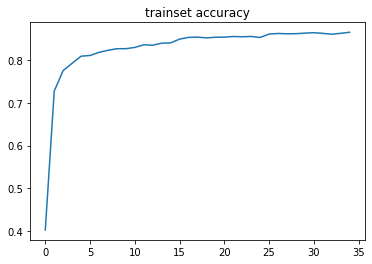

In [53]:
plt.plot(accuracy)
plt.title('trainset accuracy')

Text(0.5, 1.0, 'validset accuracy')

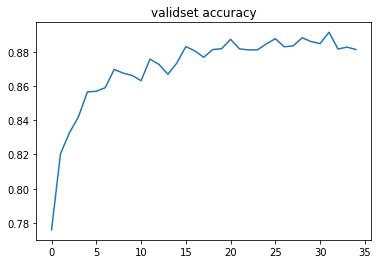

In [54]:
plt.plot(val_accuracy)
plt.title('validset accuracy')

Text(0.5, 1.0, 'trainset loss')

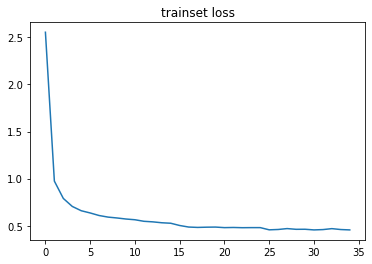

In [55]:
plt.plot(loss)
plt.title('trainset loss')

Text(0.5, 1.0, 'validset loss')

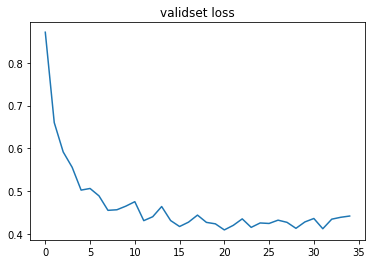

In [56]:
plt.plot(val_loss)
plt.title('validset loss')

In [2]:
accuracy

NameError: ignored